### Data Science Homework-08

#### Name: Muhammad Talha Salani
#### ID: ms07725

Purpose:

Demonstrate understating of Clustering technique for grouping and segmentation

Points: 100

Deliverables: Submit ipynb code file along with your answer

• Review IDMA Book Chapter 10 Clustering

• Use the dataset baskin_robbins_icecream.csv

• Perform clustering analysis on the following questions. Make sure to includeinterpretation of each result including visualizations to support your answer

1. Need to clean the data. Remove columns Flavour and Category for clustering
purpose.
2. Scale (normalize) the data before clustering.
3. Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot
Silhouette Coefficient plot to support your answer.
4. Perform K-Means clustering again with optimal number of clusters.
5. Visualize the clustering results.
6. Use cluster labels to create cluster specific data frames from original dataset.
7. Generate at least 3 insights from your clustering results to show unique and
interesting features for each cluster. Discuss your findings.
8. Can you suggest a unique name for each cluster? For example if a cluster is showing
high Sugar level, then you can call it a “SugarLovers” cluster.


In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import math
from itertools import combinations

In [141]:
df = pd.read_csv('baskin_robbins_icecream.csv')

In [142]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [143]:
df_cleaned = df.drop(['Flavour', 'Category'], axis=1)

print(df_cleaned.isnull().sum())

Calories             0
Total Fat (g)        0
Trans Fat (g)        0
Carbohydrates (g)    0
Sugars (g)           0
Protein (g)          0
dtype: int64


In [144]:
df_cleaned

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0
...,...,...,...,...,...,...
65,200,10.0,0.4,24,21,4.0
66,120,0.5,0.0,27,20,0.1
67,80,1.5,0.0,16,12,1.0
68,160,8.0,0.2,20,16,2.0


In [145]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
df_scaled

array([[-0.51819396, -0.32481093, -0.53353016, -0.53584393, -0.20477091,
        -0.9400199 ],
       [-0.51819396, -0.19807311, -0.53353016, -0.72061769, -0.87667545,
        -0.34018952],
       [-0.35479947, -0.19807311,  0.15808301, -0.35107016, -0.42873909,
        -0.34018952],
       [-1.17177192, -0.83176221, -1.22514333, -1.09016523, -0.20477091,
        -0.34018952],
       [-1.00837743, -1.08523785, -1.22514333,  0.57279868,  0.69110182,
        -0.9400199 ],
       [-0.68158845, -0.32481093,  0.15808301, -0.90539146, -0.65270727,
        -0.34018952],
       [-1.17177192, -0.70502439, -1.22514333, -0.35107016, -2.89238908,
        -0.34018952],
       [-0.35479947, -0.32481093, -0.53353016, -0.35107016,  0.01919727,
        -0.34018952],
       [ 0.13538401, -0.32481093, -0.53353016,  2.79008389, -2.22048454,
         0.85947125],
       [ 0.46217299,  0.05540253,  0.84969618,  0.57279868,  0.46713363,
         0.25964087],
       [-0.02801048,  0.05540253, -0.53353016, -0.

In [146]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)

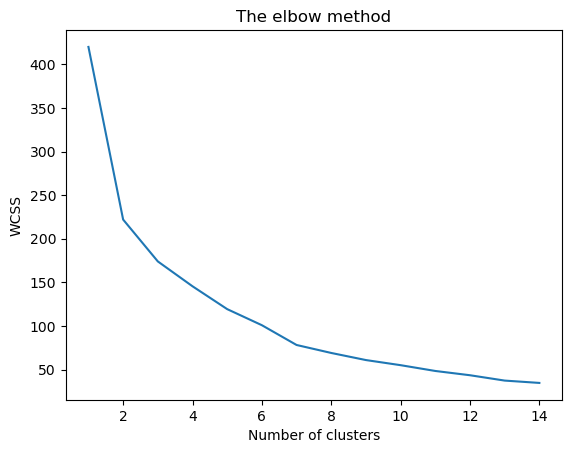

In [147]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point, when the WCSS decline rate slows after a large drop, is visible at about three clusters. This suggests that the benefits of lowering WCSS decrease when more clusters are added.

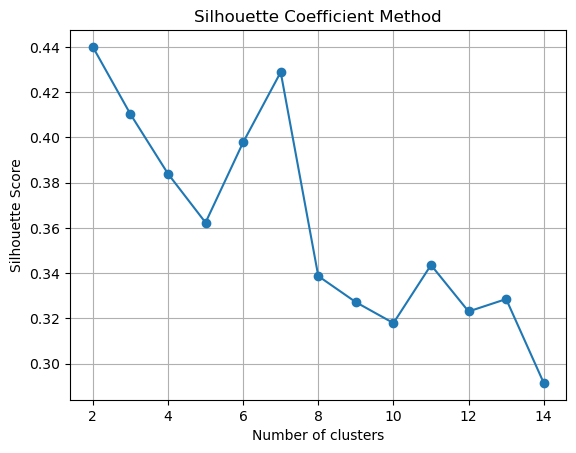

In [149]:
silhouette_scores = []
for i in range(2, 15): 
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=99)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
    silhouette_scores.append(score)

plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

At n=3, the silhouette score is 0.41, which is a respectable result.

In [151]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(df_scaled)
score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
score

0.37382649946534596

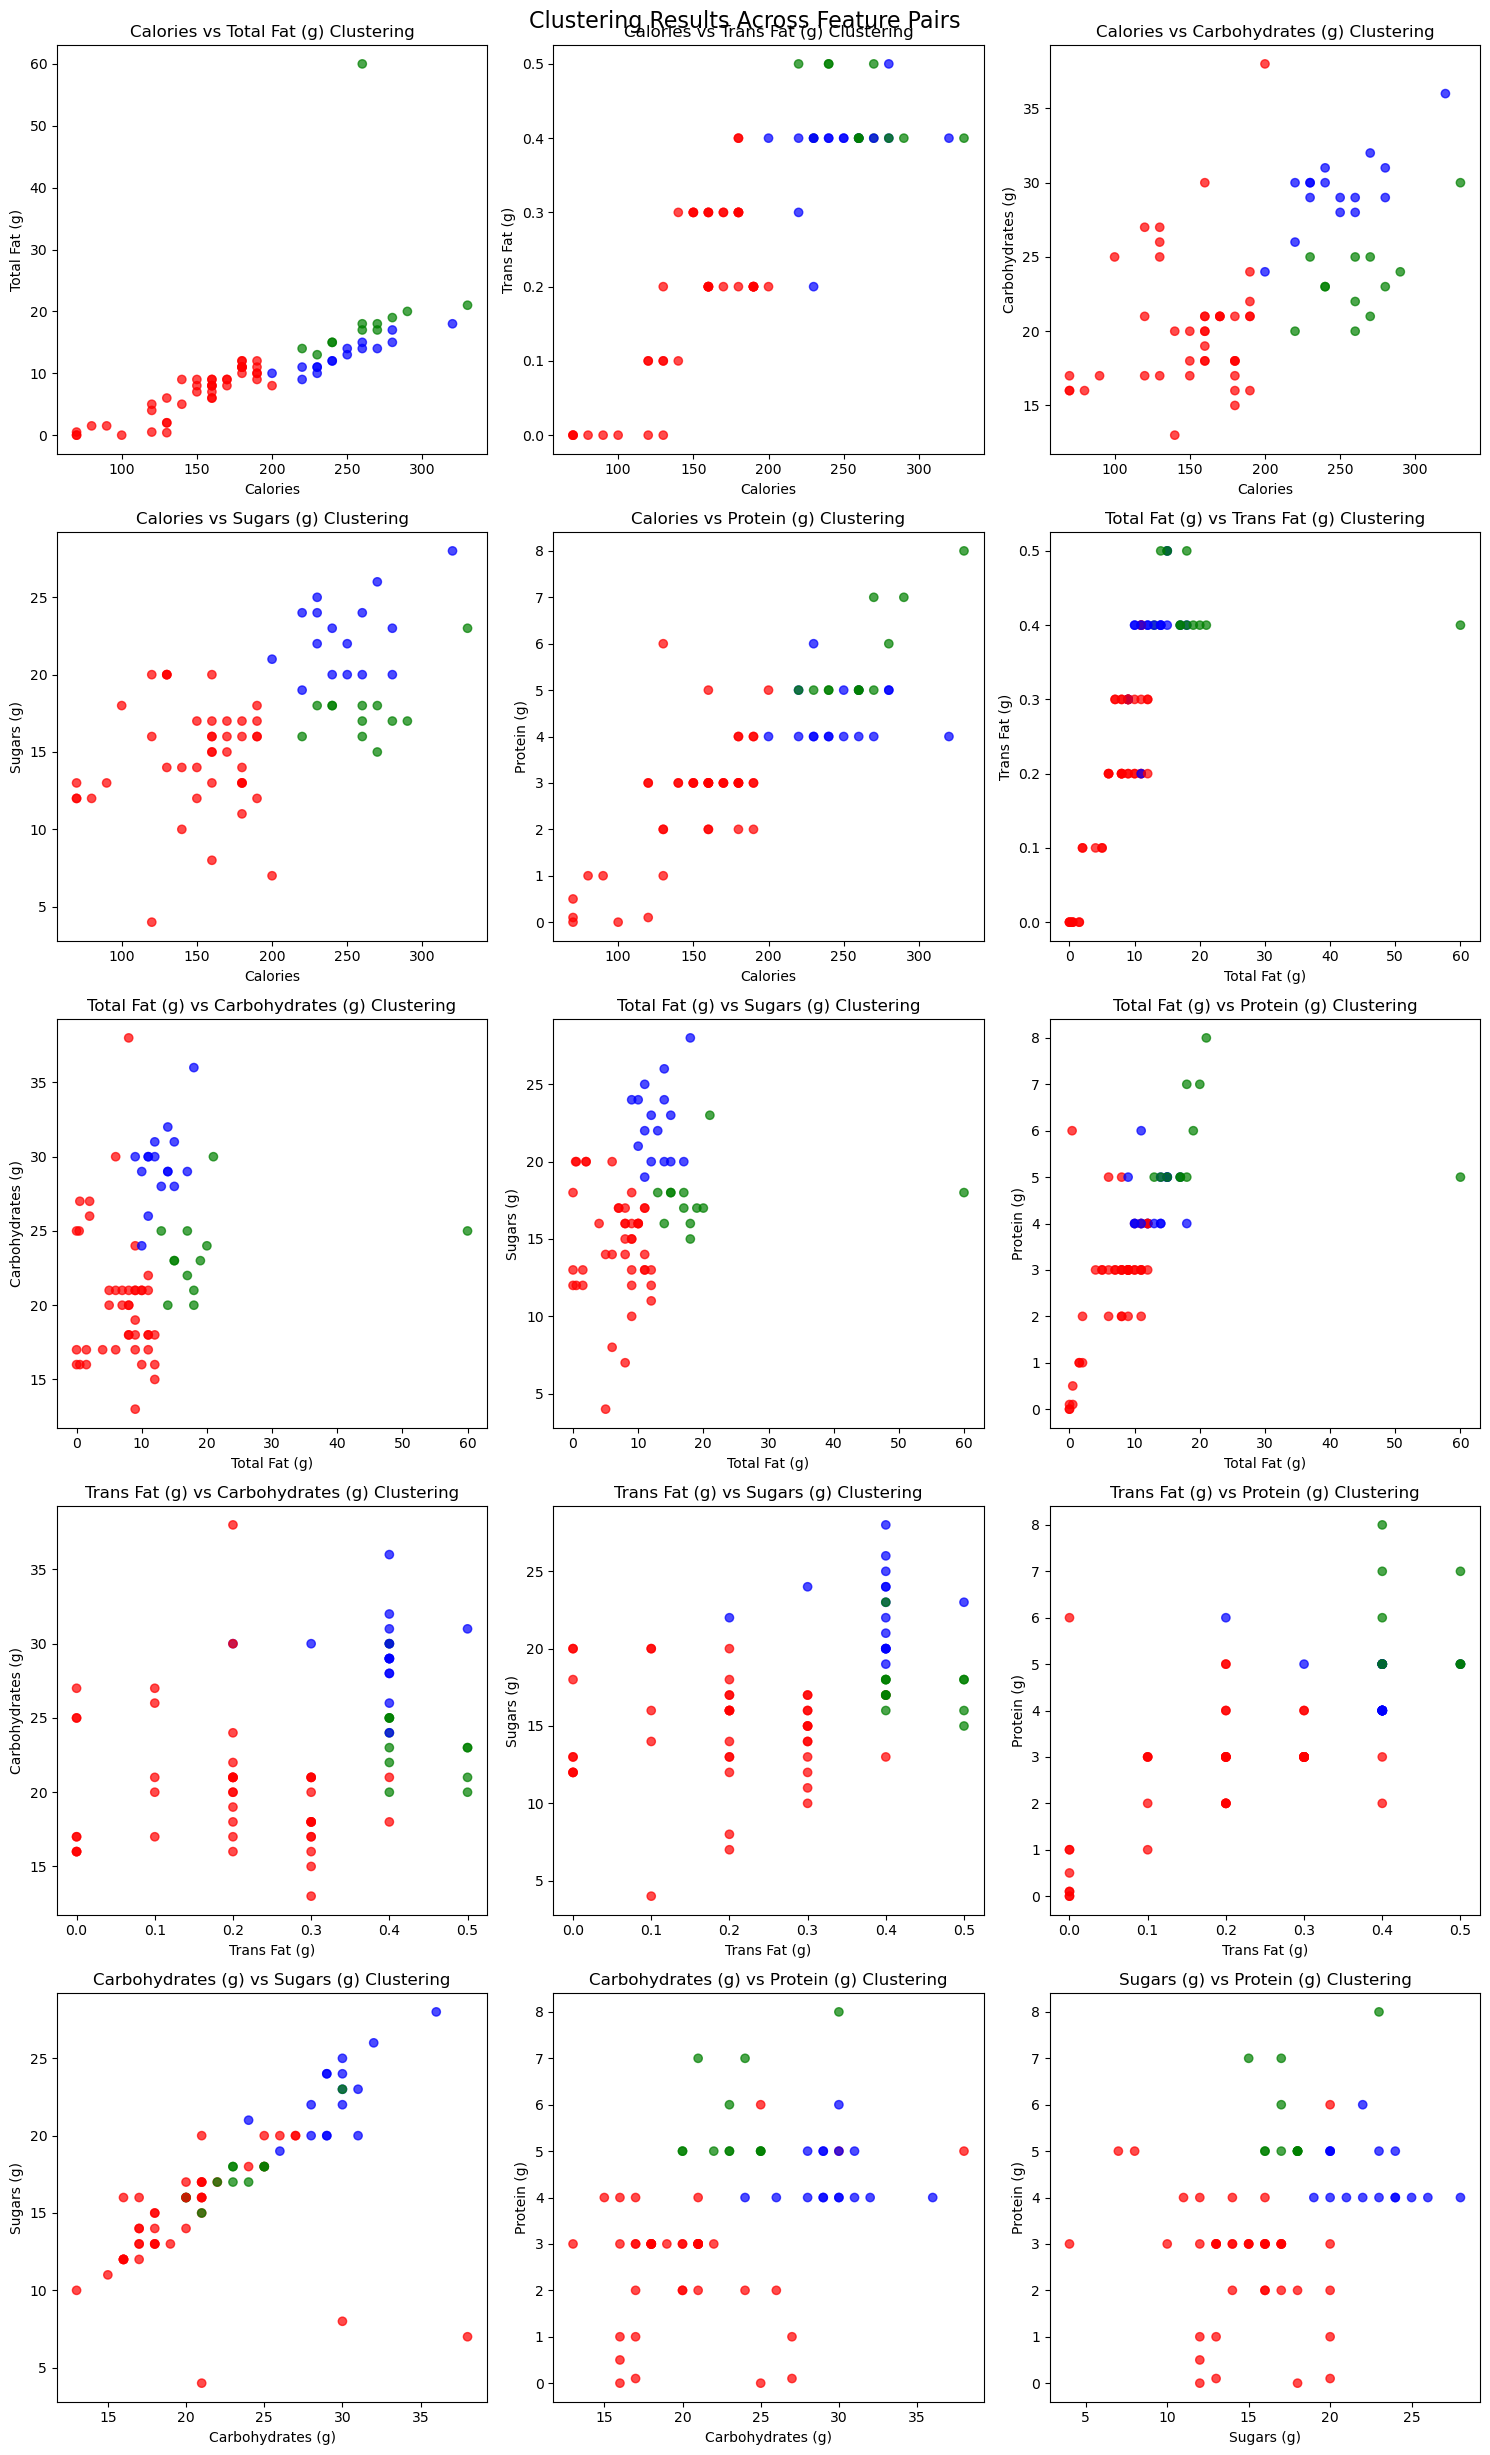

In [152]:
feature_pairs = combinations(df_cleaned.columns, 2)

total_plots = len(list(feature_pairs))
columns = 3
rows = math.ceil(total_plots / columns)

colors = np.array(['green', 'red', 'blue'])

plt.figure(figsize=(15, 5 * rows))

feature_pairs = list(combinations(df_cleaned.columns, 2))

for index, (feature_x, feature_y) in enumerate(feature_pairs, start=1):
    ax = plt.subplot(rows, columns, index)
    scatter = ax.scatter(
        df_cleaned[feature_x],
        df_cleaned[feature_y],
        c=colors[kmeans.labels_],
        alpha=0.7
    )
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(f'{feature_x} vs {feature_y} Clustering')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.suptitle("Clustering Results Across Feature Pairs", fontsize=16)
plt.show()


The clusters in a number of scatter plots are reasonably well-separated, particularly when it comes to qualities including "Calories," "Total Fat," and "Trans Fat." However, there appears to be a lot of overlap between the clusters in some plots (such as Carbohydrates vs. Sugar), which suggests that these attributes might not be as useful for differentiating between the clusters.

In [154]:
cluster_1 = df_cleaned.iloc[Y == 0, :]
cluster_2 = df_cleaned.iloc[Y == 1, :]
cluster_3 = df_cleaned.iloc[Y == 2, :]

In [155]:
cluster_1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,262.500000,20.583333,0.433333,23.416667,17.583333,5.666667
std,29.580399,12.645217,0.049237,2.745520,1.975225,1.073087
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.750000,16.750000,5.000000
50%,260.000000,17.500000,0.400000,23.000000,17.500000,5.000000
75%,272.500000,19.250000,0.500000,25.000000,18.000000,6.250000
max,330.000000,60.000000,0.500000,30.000000,23.000000,8.000000


In [156]:
cluster_2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,149.761905,6.819048,0.190476,20.238095,14.571429,2.635714
std,36.122292,3.889275,0.118547,4.600157,3.527888,1.347956
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,130.000000,4.250000,0.100000,17.000000,13.000000,2.000000
50%,160.000000,8.000000,0.200000,20.000000,15.000000,3.000000
75%,180.000000,9.750000,0.300000,21.000000,17.000000,3.000000
max,200.000000,12.000000,0.400000,38.000000,20.000000,6.000000


In [157]:
cluster_3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,248.750000,12.875000,0.387500,29.500000,22.562500,4.437500
std,29.410882,2.578759,0.061914,2.607681,2.528998,0.629153
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,28.750000,20.000000,4.000000
50%,245.000000,12.500000,0.400000,29.500000,22.500000,4.000000
75%,262.500000,14.250000,0.400000,30.250000,24.000000,5.000000
max,320.000000,18.000000,0.500000,36.000000,28.000000,6.000000


#### Insights:

1. Meals in Cluster 1 are defined by their high calorie and fat content, with an average of 262.5 calories and 20.58 grams of total fat. The average protein content of these meals is 5.67 grams, which indicates a nutritional profile that strongly favors rich, decadent foods. Customers who favor heartier, higher-calorie meals are likely to find this cluster appealing since it represents more indulgent or fast-food-style goods. However, those who are looking for a balanced or health-conscious diet may find these meals less appropriate due to their high fat content.

2. On the other hand, meals in Cluster 2 have the lowest total fat content (6.82 grams) and are substantially fewer in calories (averaging 149.76). These meals are a desirable option for consumers who are concerned about their health or who are trying to control their weight because they also include less sugar than the other clusters. The low protein level, which averages 2.64 grams, raises the possibility that these meals would not have the proper protein balance and would be more appropriate as light meals or snacks rather than filling, substantial meals.

3. With averages of 29.5 grams for carbohydrates and 22.56 grams for sugar, Cluster 3 is notable for having high levels of both nutrients. Although this cluster has a reasonable calorie value of 248.75 and a total fat content of 12.88 grams, it is significantly biased toward meals that are high in carbohydrates and sugar. This nutritional profile recommends foods like sweetened drinks or meals high in carbohydrates for people seeking a rapid energy boost or a sweet pleasure. For those who value a higher protein diet or are attempting to cut back on sugar, these meals might not be the best option.

#### Giving Clusters Unique Names:

1. Cluster 1: "IndulgentEats"
2. Cluster 2: "FitBites"
3. Cluster 3: "CarbCravers"